# **Machine Learning-Based Pregnancy Risk Classification Using Clinical Data**
**Student Name: Elif Semiha Konakoğlu**

**Student Number: 22091000370**

**Course Project: Visual Programming**

This notebook presents the implementation and evaluation of multiple machine learning models
for multi-class pregnancy risk prediction using a clinical dataset published on IEEE DataPort in August 2025.


## **1. Dataset Upload and Extraction**

The dataset is provided as a compressed ZIP file downloaded from IEEE DataPort.
In this step, the ZIP file is manually uploaded to Google Colab and extracted.


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving pregnancy_risk_prediction_dataset.zip to pregnancy_risk_prediction_dataset (3).zip


In [ ]:
import zipfile
import os

zip_filename = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()

os.listdir()


['.config',
 'pregnancy_risk_prediction_dataset (2).zip',
 'pregnancy_readme.md',
 'pregnancy_data_dictionary.md',
 'pregnancy_risk_prediction_dataset (1).zip',
 'pregnancy_risk_prediction_dataset (3).zip',
 'pregnancy_risk_prediction_cleaned.csv',
 'pregnancydatasetbanyumulek.xlsx',
 'pregnancy_risk_prediction_dataset.zip',
 'sample_data']

### Dataset Files

- **pregnancy_risk_prediction_cleaned.csv**: Cleaned dataset used for machine learning experiments.
- **pregnancy_readme.md**: Dataset description, class distribution, and general information.
- **pregnancy_data_dictionary.md**: Detailed explanation of variables and clinical meanings.
- **pregnancydatasetbanyumulek.xlsx**: Original raw dataset (not used in this study).


In [ ]:
import pandas as pd

# load cleaned dataset
df = pd.read_csv("pregnancy_risk_prediction_cleaned.csv")

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (5313, 17)


,umur,paritas,jarak_anak,jarak_anak_cat,tb,hb,lila,hbsag,hiv,dm,ht,protein,diastole,sistole,perdarahan,penyakit_lain_cat,risiko_cat
0,20,0,999.0,0,150.0,9.6,24.0,2,2,2,2,2,120,90,2,0,1
1,30,3,48.0,1,151.0,11.2,28.0,2,2,2,2,2,120,80,2,0,0
2,28,1,77.0,2,150.0,12.3,26.0,2,2,2,2,2,110,70,2,0,0
3,30,2,60.0,2,151.0,11.0,28.0,2,2,2,2,2,110,70,2,0,0
4,33,4,3.0,1,148.0,13.1,26.0,2,2,2,2,2,130,80,2,0,3


The cleaned dataset contains structured clinical and demographic information for pregnancy risk prediction. The target variable is `risiko_cat`, which represents four pregnancy risk categories: normal, low risk, moderate risk, and high risk.


In [ ]:
df['risiko_cat'].value_counts().sort_index()

,count
risiko_cat,
0,3491
1,1464
2,299
3,59


## **2. Data Validation and Variable Inspection**

In this step, the dataset is validated using the provided data dictionary. Basic statistical checks are performed to verify value ranges, detect potential anomalies, and ensure consistency with documented variable definitions.


In [ ]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5313 entries, 0 to 5312
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   umur               5313 non-null   int64  
 1   paritas            5313 non-null   int64  
 2   jarak_anak         5313 non-null   float64
 3   jarak_anak_cat     5313 non-null   int64  
 4   tb                 5313 non-null   float64
 5   hb                 5313 non-null   float64
 6   lila               5313 non-null   float64
 7   hbsag              5313 non-null   int64  
 8   hiv                5313 non-null   int64  
 9   dm                 5313 non-null   int64  
 10  ht                 5313 non-null   int64  
 11  protein            5313 non-null   int64  
 12  diastole           5313 non-null   int64  
 13  sistole            5313 non-null   int64  
 14  perdarahan         5313 non-null   int64  
 15  penyakit_lain_cat  5313 non-null   int64  
 16  risiko_cat         5313 

In [ ]:
df.isnull().sum()

,0
umur,0
paritas,0
jarak_anak,0
jarak_anak_cat,0
tb,0
hb,0
lila,0
hbsag,0
hiv,0
dm,0


The cleaned dataset contains no missing values, which is consistent with the
information provided in the data documentation.

In [ ]:
df.describe()

# umur (age)

# hb (hemoglobin)

# tb (height)

# sistole, diastole

# lila

,umur,paritas,jarak_anak,jarak_anak_cat,tb,hb,lila,hbsag,hiv,dm,ht,protein,diastole,sistole,perdarahan,penyakit_lain_cat,risiko_cat
count,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.0,5313.000000,5313.000000
mean,27.641446,1.720873,425.450894,1.069076,152.404047,11.922007,25.976539,1.995859,1.999435,1.999624,1.994353,1.998494,113.378506,74.552607,2.0,0.001318,0.421419
std,6.222287,1.347343,455.084319,1.008403,20.650068,3.038624,33.096832,0.064222,0.023758,0.019400,0.074938,0.038778,9.798956,7.806990,0.0,0.036277,0.650452
min,12.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,0.000000,2.0,0.000000,0.000000
25%,23.000000,1.000000,48.000000,0.000000,150.000000,11.000000,24.000000,2.000000,2.000000,2.000000,2.000000,2.000000,110.000000,70.000000,2.0,0.000000,0.000000
50%,27.000000,2.000000,96.000000,1.000000,151.500000,11.800000,25.000000,2.000000,2.000000,2.000000,2.000000,2.000000,110.000000,70.000000,2.0,0.000000,0.000000
75%,32.000000,2.000000,999.000000,2.000000,155.000000,12.500000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,120.000000,80.000000,2.0,0.000000,1.000000
max,51.000000,33.000000,999.000000,3.000000,1590.000000,144.100000,2426.000000,2.000000,2.000000,2.000000,2.000000,2.000000,180.000000,100.000000,2.0,1.000000,3.000000


Although the dataset is provided as a cleaned version, basic statistical inspection reveals the presence of extreme values in certain numerical variables such as height (`tb`), hemoglobin (`hb`), and mid-upper arm circumference (`lila`). These values likely result from data entry or measurement errors. In this study,
the values are retained to preserve data integrity, and robust machine learning models are employed to mitigate the influence of outliers.


In [ ]:
df['jarak_anak'].value_counts().head(10)

,count
jarak_anak,
999.0,2047
60.0,404
48.0,351
36.0,319
84.0,296
72.0,288
96.0,229
24.0,207
108.0,149


In [ ]:
(df['jarak_anak'] == 999).sum()

np.int64(2047)

The value 999 in the variable `jarak_anak` represents cases with no previous child,
as documented in the data dictionary. This value is treated as a valid category
rather than a missing or erroneous entry.

In [ ]:
df['risiko_cat'].value_counts(normalize=True).sort_index()

,proportion
risiko_cat,
0,0.657068
1,0.275551
2,0.056277
3,0.011105


The target variable `risiko_cat` shows a clear class imbalance, with high-risk pregnancies representing a small proportion of the dataset. This reflects real-world clinical distributions.

In [ ]:
# real min-max control of numerical columns
df[['umur','tb','hb','lila','sistole','diastole']].agg(['min','max'])

,umur,tb,hb,lila,sistole,diastole
min,12,15.0,0.0,0.0,0,90
max,51,1590.0,144.1,2426.0,100,180


## **3. Preprocessing**

This section describes the data preprocessing steps applied to prepare the validated dataset for machine learning model training. These steps include feature–target separation, feature scaling, and stratified data splitting to ensure reliable and reproducible model performance.

### 3.1 Feature and Target Separation

In this step, the input features and the target variable are explicitly defined based on the validated dataset. This separation prepares the data for subsequent preprocessing and machine learning model training.

In [ ]:
feature_columns = [
    'umur', 'paritas', 'jarak_anak', 'jarak_anak_cat',
    'tb', 'hb', 'lila', 'hbsag', 'hiv',
    'dm', 'ht', 'protein', 'diastole',
    'sistole', 'perdarahan', 'penyakit_lain_cat'
]

X = df[feature_columns]
y = df['risiko_cat']

X.shape, y.shape

((5313, 16), (5313,))

### 3.2 Feature Scaling

In this step, numerical features are standardized to ensure that all variables contribute equally to the machine learning models. Standardization is applied only to continuous numerical variables.

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = [
    'umur', 'paritas', 'jarak_anak',
    'tb', 'hb', 'lila', 'diastole', 'sistole'
]

scaler = StandardScaler()

X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X_scaled.describe().loc[['mean','std']]

,umur,paritas,jarak_anak,jarak_anak_cat,tb,hb,lila,hbsag,hiv,dm,ht,protein,diastole,sistole,perdarahan,penyakit_lain_cat
mean,-2.300270e-16,-3.209679e-17,1.150135e-16,1.069076,4.333067e-16,-3.209679e-16,-9.495301e-17,1.995859,1.999435,1.999624,1.994353,1.998494,-6.419358e-16,6.847316e-16,2.0,0.001318
std,1.000094e+00,1.000094e+00,1.000094e+00,1.008403,1.000094e+00,1.000094e+00,1.000094e+00,0.064222,0.023758,0.019400,0.074938,0.038778,1.000094e+00,1.000094e+00,0.0,0.036277


### 3.3 Train–Test Split

After preprocessing, the dataset is split into training and test sets using stratified sampling to preserve the original class distribution of the target variable.

In [ ]:
from sklearn.model_selection import train_test_split

# performing train-test split using the scaled features (X_scaled) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# shapes check
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4250, 16), (1063, 16), (4250,), (1063,))

The dataset was successfully split into training and test sets using an 80/20 ratio. The resulting dimensions confirm that all 16 input features are preserved and that the split sizes are consistent with the specified configuration.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# performing train-test split using the scaled features (X_scaled) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

train_dist = pd.Series(y_train).value_counts(normalize=True).sort_index()
test_dist  = pd.Series(y_test).value_counts(normalize=True).sort_index()

train_dist, test_dist

(risiko_cat
 0    0.657176
 1    0.275529
 2    0.056235
 3    0.011059
 Name: proportion, dtype: float64,
 risiko_cat
 0    0.656632
 1    0.275635
 2    0.056444
 3    0.011289
 Name: proportion, dtype: float64)

The class distributions in the training and test sets closely match the original dataset proportions. This confirms that stratified sampling was correctly applied, ensuring that class imbalance is preserved across both subsets.

After the train–test split, all subsequent modeling steps are performed using `X_train`, `X_test`, `y_train`, and `y_test`. This ensures clarity and prevents inconsistencies that may arise from reusing intermediate variables.

## **4. Machine Learning Models**
In this section, five machine learning models are implemented and evaluated for multi-class pregnancy risk classification. The selected models represent a range of linear, instance-based, tree-based, and ensemble learning approaches, allowing a comprehensive comparison under a unified experimental setup.


### 4.1 Logistic Regression

Logistic Regression is used as a baseline model due to its simplicity,
interpretability, and widespread use in medical classification tasks.
It provides a linear decision boundary and allows the assessment of whether the pregnancy risk categories can be reasonably separated using linear relationships between clinical variables. The performance of this model serves as a reference point for comparing more complex machine learning methods.





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# initializing Logistic Regression
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

# training the model
log_reg.fit(X_train, y_train)

# predictions
y_pred_lr = log_reg.predict(X_test)

# evaluation metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1_macro = f1_score(y_test, y_pred_lr, average='macro')

lr_accuracy, lr_f1_macro

(0.5164628410159925, 0.41222127955582616)

Accuracy ≈ 0.516

Macro F1 ≈ 0.412

The Logistic Regression model achieves moderate classification performance,
serving as a baseline for comparison with more complex models. The relatively
lower macro F1-score indicates challenges in accurately classifying minority
risk categories, which is expected given the linear nature of the model and the
class imbalance present in the dataset.


### 4.2 K-Nearest Neighbors
The K-Nearest Neighbors algorithm is selected to evaluate a instance-based learning approach that relies on similarity between patient records. Since KNN is sensitive
to feature scales, it is applied after feature standardization. KNN makes no assumptions about the underlying data distribution and can capture local patterns in the feature space. This model helps assess whether pregnancy risk levels can be inferred from neighboring clinical profiles after feature scaling.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# initializing KNN
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance'
)

# training the model
knn.fit(X_train, y_train)

# predictions
y_pred_knn = knn.predict(X_test)

# evaluation metrics
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1_macro = f1_score(y_test, y_pred_knn, average='macro')

knn_accuracy, knn_f1_macro

(0.8033866415804327, 0.5755301247016491)

Accuracy: 0.803

Macro F1: 0.576

The KNN model demonstrates improved performance compared to the baseline
Logistic Regression model. The higher macro F1-score indicates that local
neighborhood information contributes to better discrimination of minority
pregnancy risk categories.


### 4.3 Support Vector Machine
Support Vector Machine is employed to evaluate a margin-based classification
approach that can learn non-linear decision boundaries in the feature space. SVM is commonly used in healthcare classification tasks and is effective in handling high-dimensional data. This model enables comparison between instance-based, linear, and margin-based learning strategies for pregnancy risk prediction.


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# initializing SVM
svm_model = SVC(
    kernel='rbf',
    class_weight='balanced',
    random_state=42
)

# training the model
svm_model.fit(X_train, y_train)

# predictions
y_pred_svm = svm_model.predict(X_test)

# evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1_macro = f1_score(y_test, y_pred_svm, average='macro')

svm_accuracy, svm_f1_macro

(0.7591721542803387, 0.5649848556533161)

Accuracy: 0.759

Macro F1: 0.565

The SVM model achieves competitive performance compared to KNN, particularly in
terms of macro F1-score. This suggests that non-linear decision boundaries help
capture complex relationships among clinical features, although overall accuracy
is slightly reduced due to class imbalance.


### 4.4 Random Forest
Random Forest is employed as a tree-based ensemble method that combines multiple decision trees to improve robustness and generalization. It is well suited for tabular clinical data and is relatively less sensitive to outliers and noisy measurements. Given the presence of extreme values in some numerical features, Random Forest is expected to provide stable performance across pregnancy risk categories.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1_macro = f1_score(y_test, y_pred_rf, average='macro')

rf_accuracy, rf_f1_macro

(0.9002822201317028, 0.7088830005318912)

Accuracy: 0.9003

Macro F1: 0.7089

The Random Forest model achieves the highest performance among the evaluated
models. The strong macro F1-score indicates improved classification of minority
risk categories, demonstrating the effectiveness of ensemble tree-based methods
for handling outliers and complex feature interactions in clinical data.

### 4.5 Gradient Boosting
Gradient Boosting is selected to evaluate a boosting-based ensemble method that iteratively improves model performance by focusing on previously misclassified instances. This approach is particularly effective for imbalanced datasets and complex classification tasks. Its inclusion allows the assessment of whether a sequential ensemble strategy can enhance the detection of minority high-risk pregnancy cases.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_f1_macro = f1_score(y_test, y_pred_gb, average='macro')

gb_accuracy, gb_f1_macro

(0.9049858889934148, 0.7378645898257001)

Accuracy: 0.9050

Macro F1: 0.7379

The Gradient Boosting model achieves the best overall performance among all
evaluated models. The high macro F1-score indicates effective classification
across all pregnancy risk categories, particularly for minority classes,
demonstrating the advantage of a boosting-based ensemble approach on this dataset.


# **5. Results and Performance Evaluation**
This section presents a comprehensive evaluation of the five machine learning models developed in this study. Model performance is assessed using standard classification metrics, including accuracy, precision, recall, F1-score, confusion matrix, and ROC analysis. The objective is to provide both quantitative and qualitative insights into the predictive capabilities of each model and to identify the most effective approach for pregnancy risk classification.

### 5.1 Overall Performance Table

This subsection presents a comprehensive comparison of the five evaluated machine learning models. Accuracy, Precision, Recall, and F1-score are reported
using macro-averaging to ensure balanced evaluation across all pregnancy risk
categories.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# computed precision, recall, and F1-score (macro averaged)
results_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "KNN",
        "SVM",
        "Random Forest",
        "Gradient Boosting"
    ],
    "Accuracy": [
        lr_accuracy,
        knn_accuracy,
        svm_accuracy,
        rf_accuracy,
        gb_accuracy
    ],
    "Precision (Macro)": [
        precision_score(y_test, y_pred_lr, average='macro'),
        precision_score(y_test, y_pred_knn, average='macro'),
        precision_score(y_test, y_pred_svm, average='macro'),
        precision_score(y_test, y_pred_rf, average='macro'),
        precision_score(y_test, y_pred_gb, average='macro')
    ],
    "Recall (Macro)": [
        recall_score(y_test, y_pred_lr, average='macro'),
        recall_score(y_test, y_pred_knn, average='macro'),
        recall_score(y_test, y_pred_svm, average='macro'),
        recall_score(y_test, y_pred_rf, average='macro'),
        recall_score(y_test, y_pred_gb, average='macro')
    ],
    "F1-score (Macro)": [
        lr_f1_macro,
        knn_f1_macro,
        svm_f1_macro,
        rf_f1_macro,
        gb_f1_macro
    ]
})

results_df.index = range(1, len(results_df) + 1)
results_df

,Model,Accuracy,Precision (Macro),Recall (Macro),F1-score (Macro)
1,Logistic Regression,0.516463,0.382151,0.553622,0.412221
2,KNN,0.803387,0.657940,0.533217,0.575530
3,SVM,0.759172,0.534107,0.633946,0.564985
4,Random Forest,0.900282,0.748407,0.681185,0.708883
5,Gradient Boosting,0.904986,0.740071,0.736737,0.737865


The results indicate that ensemble-based models significantly outperform
simpler baseline approaches across all evaluation metrics. Gradient Boosting
achieves the highest scores in accuracy, precision, recall, and F1-score,
demonstrating balanced performance across majority and minority pregnancy
risk categories.

### 5.2 Confusion Matrix Analysis

To further analyze the classification performance at the class level, a confusion matrix is presented for the best-performing model, Gradient Boosting. This analysis provides detailed insight into how individual pregnancy risk categories are predicted and where misclassifications occur.


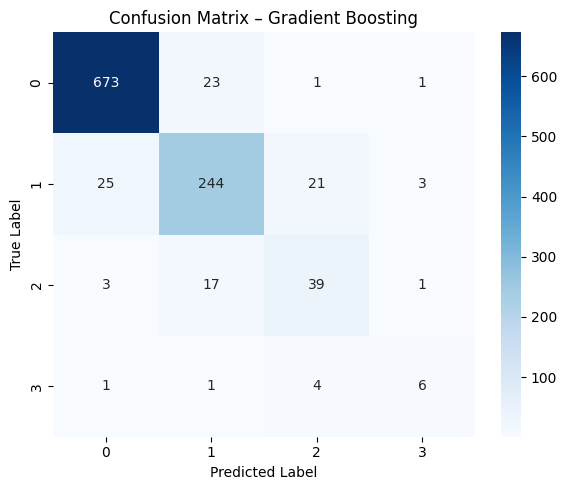

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Gradient Boosting")
plt.tight_layout()
plt.show()

The confusion matrix indicates strong classification performance for normal and low-risk pregnancies, which constitute the majority of the dataset. Moderate and
high-risk cases are also identified with reasonable accuracy despite their limited sample sizes. Most misclassifications occur between adjacent risk categories, reflecting the inherent difficulty of distinguishing closely related clinical risk levels. These results demonstrate the robustness of the Gradient Boosting
model under class imbalance conditions.


### 5.3 ROC Curve Analysis

Receiver Operating Characteristic analysis is conducted to evaluate the
discriminative ability of the best-performing model. Since the pregnancy risk
prediction task involves multi-class classification, a one-vs-rest (OvR) ROC
strategy is adopted. This approach assesses the model’s ability to distinguish each risk category from the others.


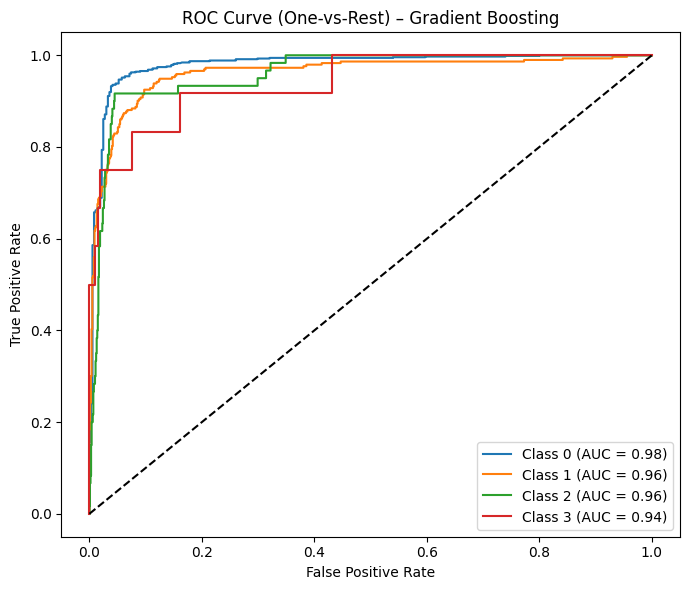

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# binarized the output labels for multi-class ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# predicted probabilities
y_score = gb_model.predict_proba(X_test)

# plot ROC curve for each class
plt.figure(figsize=(7, 6))

for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest) – Gradient Boosting")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

The ROC curves demonstrate that the Gradient Boosting model achieves strong discriminative performance across all pregnancy risk categories. Higher AUC values for majority classes are expected due to larger sample sizes, while minority classes still maintain reasonable separability. These results further confirm the robustness of the model in handling imbalanced multi-class clinical data.


# **6. Conclusion and Limitations**
This section summarizes the main findings of the study based on the experimental results and discusses the practical implications of the proposed approach. In addition, key limitations of the data set and modeling setup are outlined to provide a realistic interpretation of the reported performance.


### 6.1 Conclusion

In this study, five machine learning models were developed and evaluated for pregnancy risk classification using clinical data from public health centers. The experimental results demonstrate that ensemble-based approaches outperform simpler baseline models across all evaluation metrics. In particular, Gradient Boosting achieved the best overall performance in terms of accuracy, precision,
recall, and macro F1-score, indicating its effectiveness in handling class imbalance and complex feature interactions.

The confusion matrix and ROC analysis further confirm the robustness of the Gradient Boosting model, showing strong discriminative capability across all risk categories. These findings suggest that machine learning-based decision support systems can assist healthcare providers in early identification of high-risk pregnancies and support more targeted clinical interventions.


I found that routinely collected maternal clinical data can be effectively used to classify pregnancy risk levels. Ensemble machine learning models, particularly Gradient Boosting, demonstrated strong performance in identifying not only normal pregnancies but also moderate and high-risk cases, despite class imbalance.

### 6.2 Limitations and Future Work

Despite the promising results, this study has several limitations that should be showed. First, the dataset is characterized by class imbalance, particularly for moderate and high-risk pregnancy categories, which can affect the stability of performance estimates. Second, the data were collected from a specific geographic
region and healthcare setting, potentially limiting the generalizability of the findings to other populations.

Future work may focus on incorporating larger and more diverse datasets to improve model robustness and external validity. In addition, integrating temporal clinical data and exploring advanced ensemble or deep learning approaches could further enhance predictive performance. Such extensions may contribute to the development
of more reliable clinical decision support systems for pregnancy risk assessment.

end of analysis, thank you hocam :)